
Shape of data: (769, 13)

Missing Values:
 SITE               0
HOLE               0
CORE               0
CORE_TYPE          0
SECTION            0
TOP_DEPTH          0
BOTTOM_DEPTH       0
Max_Diameter_µm    0
Elongation         0
Age_Ma             0
Min_Diameter_µm    0
Shape Factor       0
Sphericity         0
dtype: int64

Number of duplicate rows: 0

Summary Statistics:
         SITE        CORE     SECTION   TOP_DEPTH  BOTTOM_DEPTH  \
count  769.0  769.000000  769.000000  769.000000    769.000000   
mean   925.0    6.195059    3.788036   74.298440     76.094278   
std      0.0    3.635893    1.348441   43.323468     43.319871   
min    925.0    1.000000    1.000000    0.000000      2.000000   
25%    925.0    3.000000    3.000000   36.000000     37.000000   
50%    925.0    6.000000    4.000000   76.000000     77.000000   
75%    925.0    8.000000    5.000000  112.000000    114.000000   
max    925.0   15.000000    7.000000  148.000000    150.000000   

       Max_Diameter_µm  

C:\Users\asus\AppData\Local\Temp\ipykernel_4780\2965518160.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_label = df_sorted.groupby("Age_Group")["Age_Ma"].agg(["min", "max"])


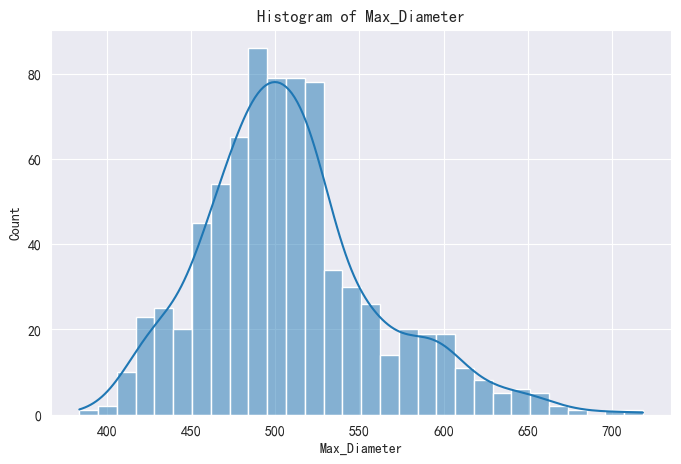

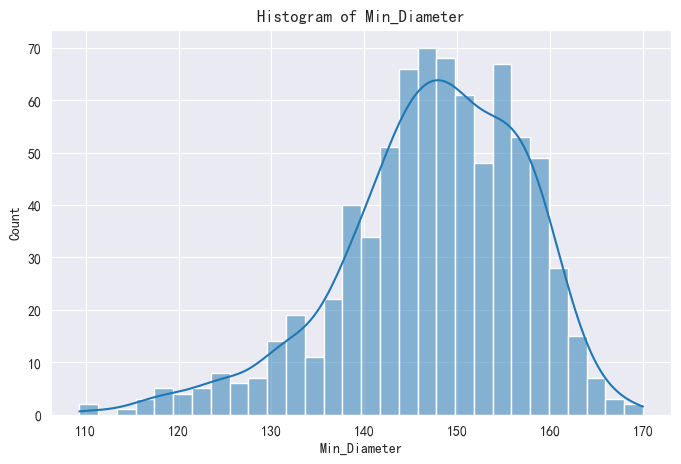

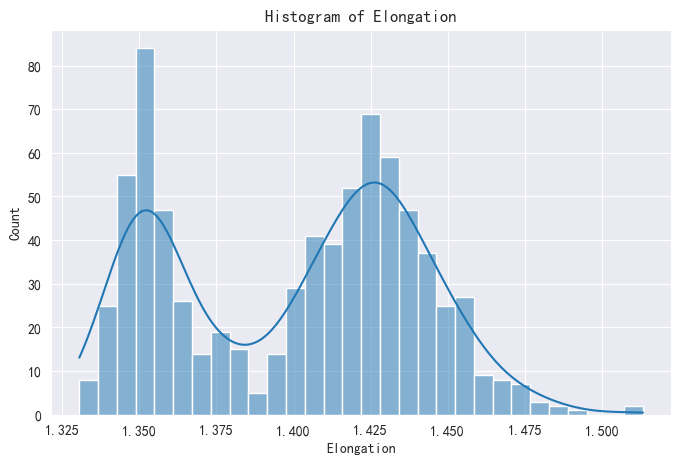


Column: Max_Diameter
Lower bound: 389.06, Upper bound: 618.11
Number of outliers: 30
Example outliers:
    SITE HOLE  CORE CORE_TYPE  SECTION  TOP_DEPTH  BOTTOM_DEPTH  Max_Diameter  \
8    925    C     1         H        2        6.0           8.0    658.789072   
13   925    C     1         H        2       69.0          71.0    621.924639   
23   925    C     1         H        3       68.0          69.0    629.001547   
27   925    C     1         H        3      119.0         120.0    648.534296   
28   925    C     1         H        3      125.0         127.0    650.740221   

    Elongation    Age_Ma  Min_Diameter  Shape Factor  Sphericity    Age_Group  
8     1.439459  0.036821    157.928737      0.793099    0.663205  0.01-0.62MA  
13    1.429319  0.050982    159.760933      0.810316    0.685280  0.01-0.62MA  
23    1.438771  0.095250    147.040468      0.775499    0.657449  0.01-0.62MA  
27    1.414270  0.108333    160.339177      0.799498    0.670208  0.01-0.62MA  
28    1.4

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

file_path = "C:/Users/asus/Desktop/question_one_data.xlsx"
save_path = "C:/Users/asus/Desktop/plots/"
os.makedirs(save_path, exist_ok=True)
df = pd.read_excel(file_path, sheet_name='Sheet1')


print("\nShape of data:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())

df.rename(columns={
    "Age_Ma": "Age_Ma",
    "Max_Diameter_µm": "Max_Diameter",
    "Min_Diameter_µm": "Min_Diameter",
    "Elongation": "Elongation"
}, inplace=True)

df_sorted = df.sort_values(by="Age_Ma", ascending=True).reset_index(drop=True)

# divid the data into two groups
df_sorted["Age_Group"] = pd.qcut(df_sorted["Age_Ma"], q=5, labels=[
    "0.01-0.62MA", "0.63-1.31MA", "1.31-1.93MA", "1.93-2.76MA", "2.77-5.00MA"
])

# calculate the gap of data
age_label = df_sorted.groupby("Age_Group")["Age_Ma"].agg(["min", "max"])
age_label["Interval"] = age_label["max"] - age_label["min"]
print("\nLabeled Age Group Time Intervals (Million Years, Ma):")
print(age_label)


selected_cols = ["Max_Diameter", "Min_Diameter", "Elongation"]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

for col in selected_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_sorted[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.savefig(f"{save_path}Histogram_{col}.png", dpi=300)
    plt.show()

# outliers
def detect_outliers_iqr(df, cols, factor=1.5):
    outliers_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_info[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "count": outlier_mask.sum(),
            "outliers": df.loc[outlier_mask]
        }
    return outliers_info

iqr_outliers = detect_outliers_iqr(df_sorted, selected_cols)
for col, info in iqr_outliers.items():
    print(f"\nColumn: {col}")
    print(f"Lower bound: {info['lower_bound']:.2f}, Upper bound: {info['upper_bound']:.2f}")
    print(f"Number of outliers: {info['count']}")
    print(f"Example outliers:\n{info['outliers'].head()}")
    
def remove_outliers_iqr(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

cleaned_data = remove_outliers_iqr(df_sorted, selected_cols)

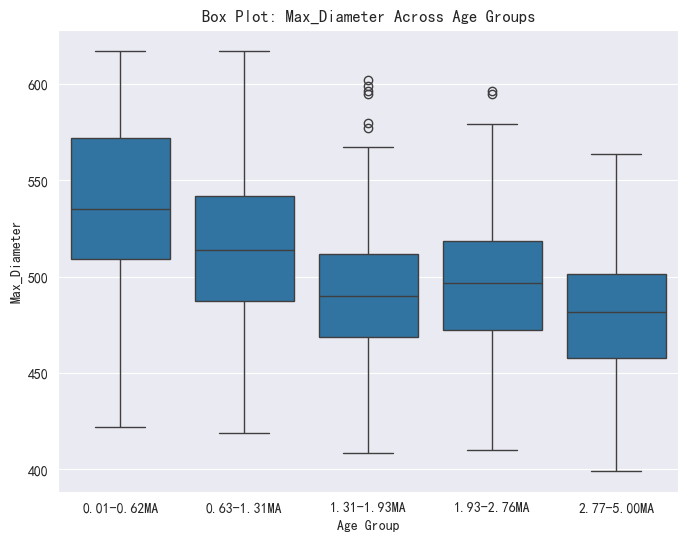

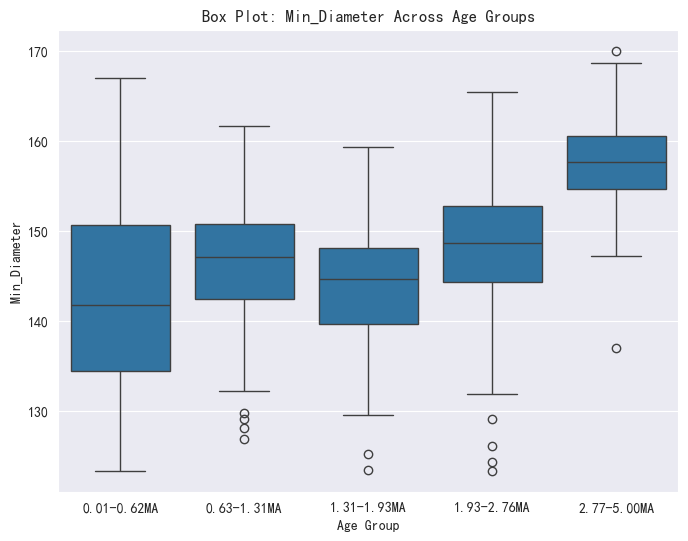

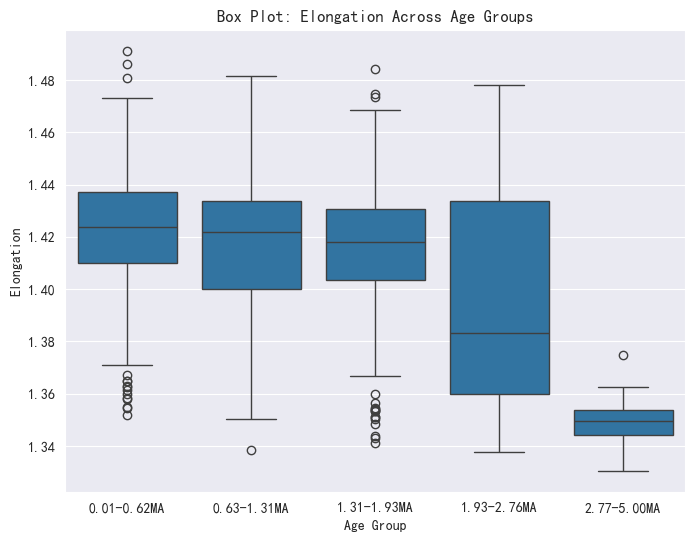

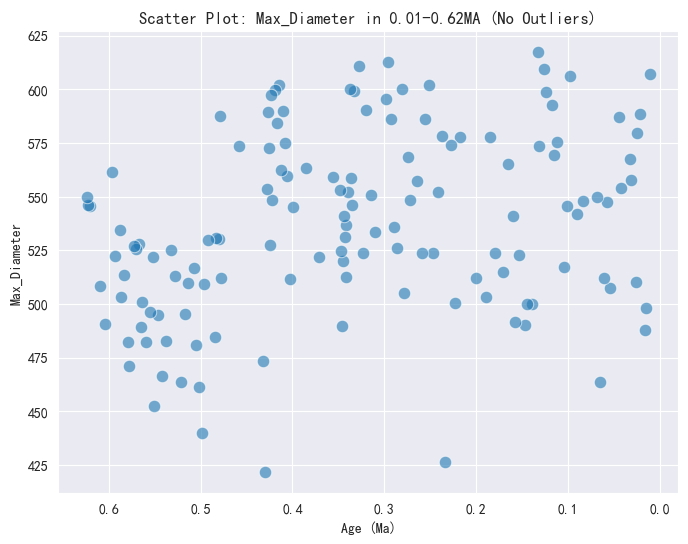

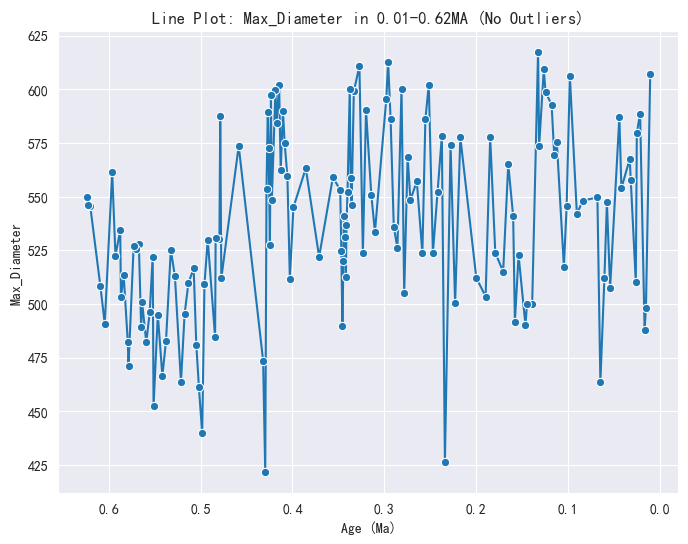

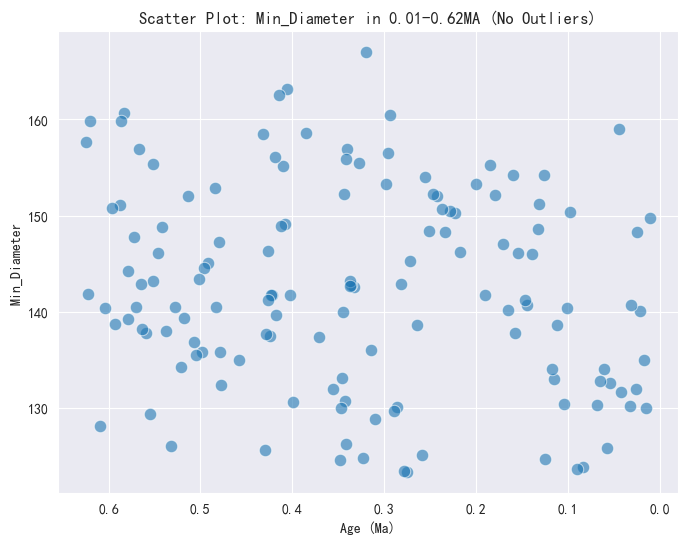

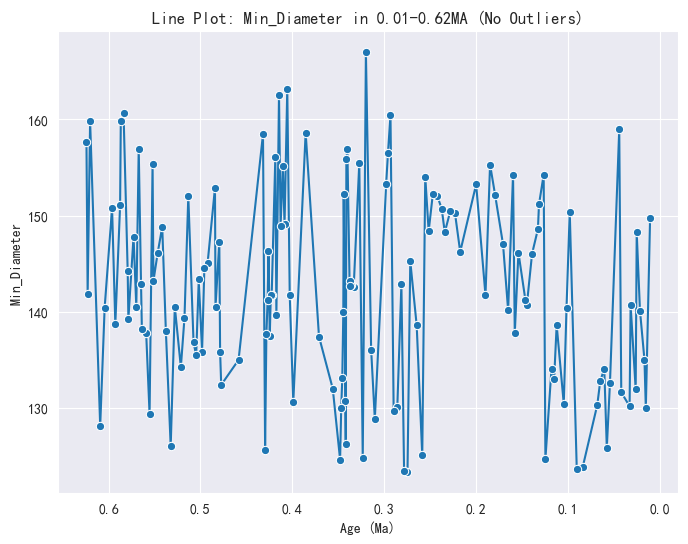

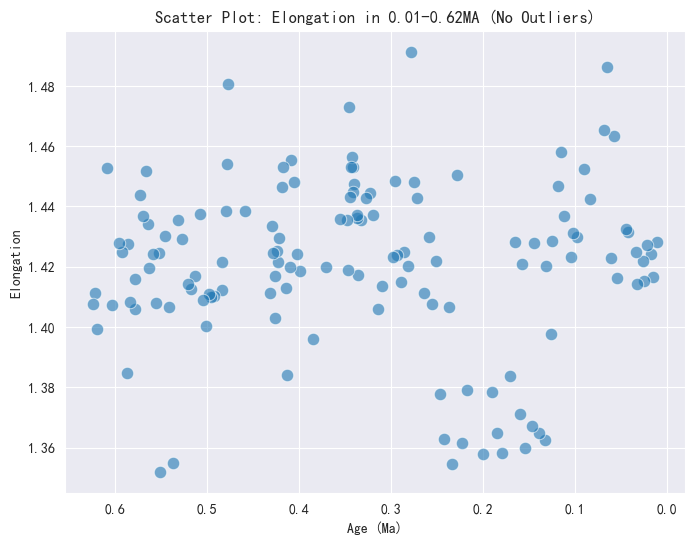

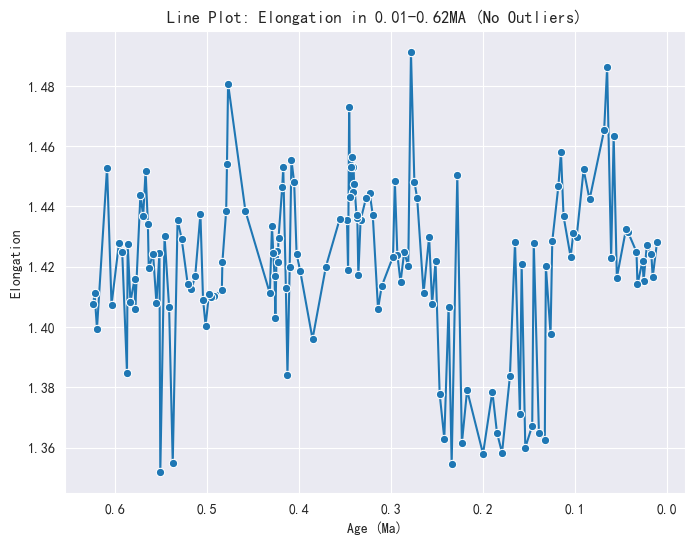

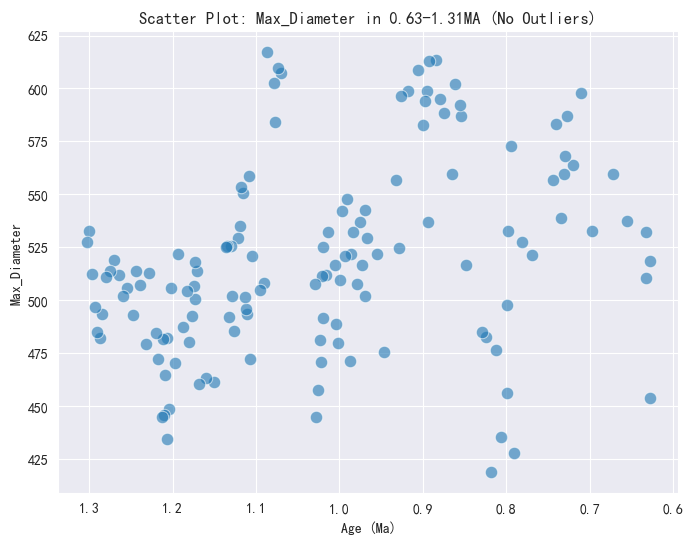

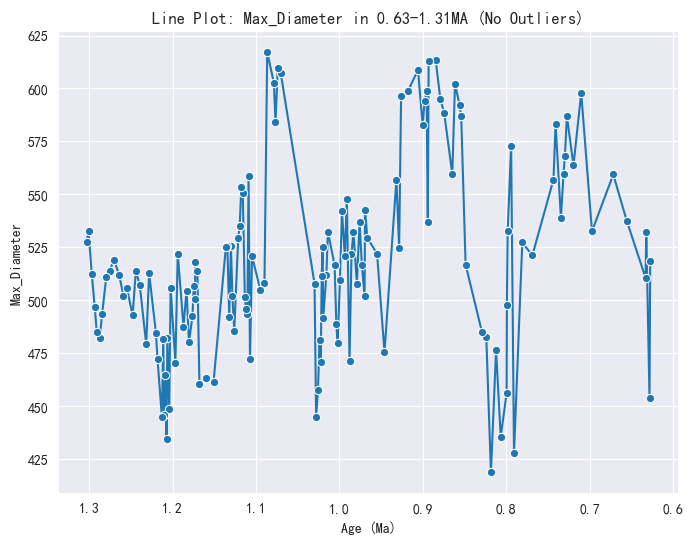

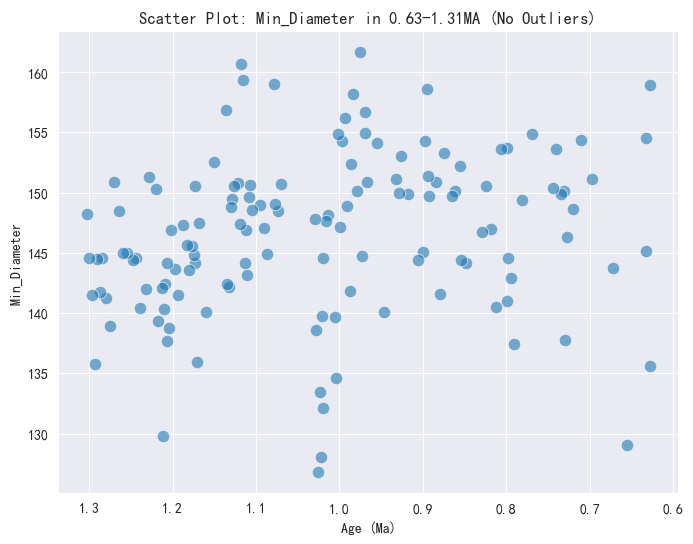

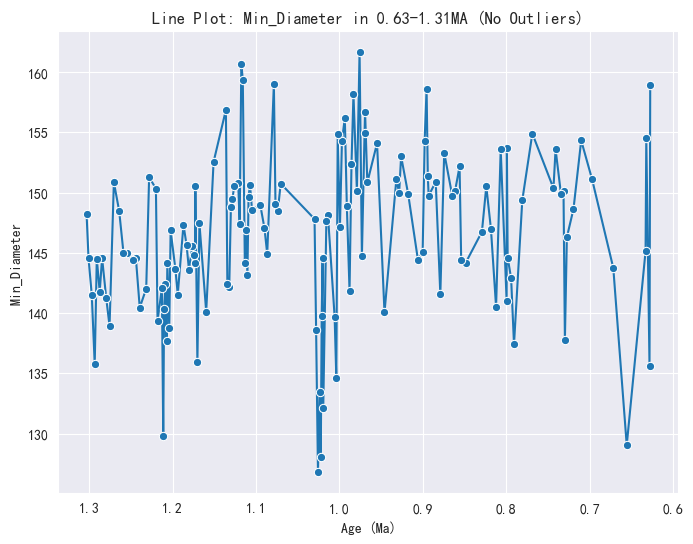

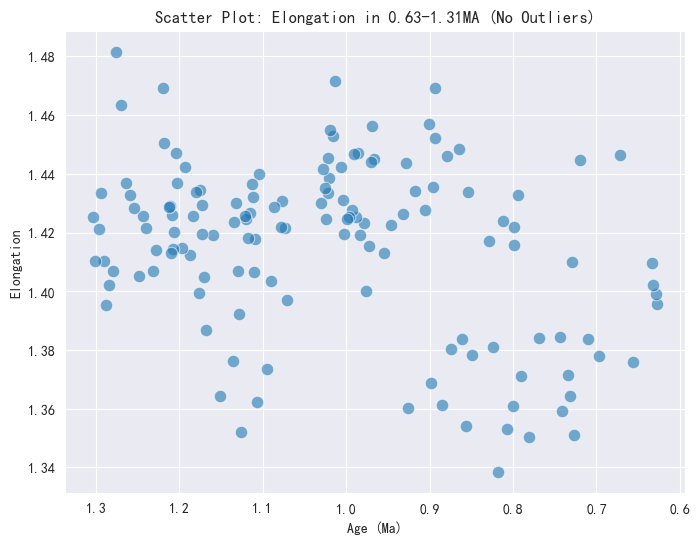

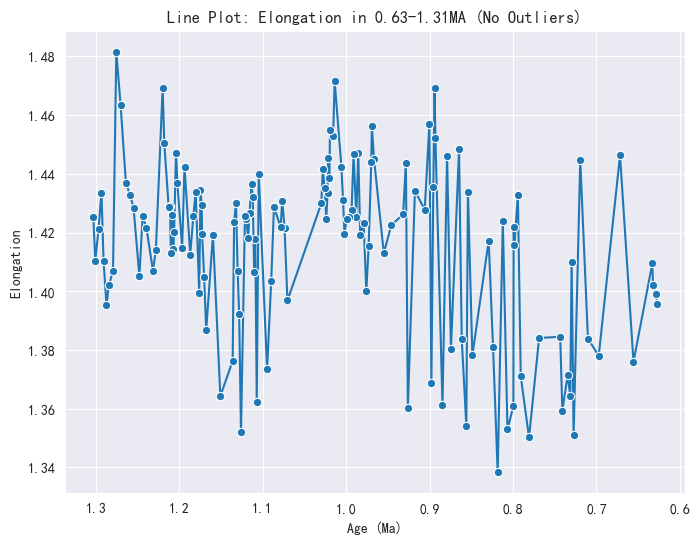

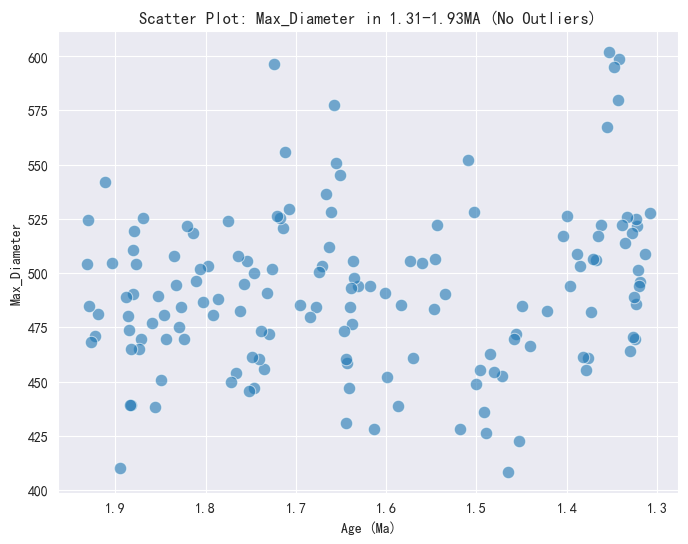

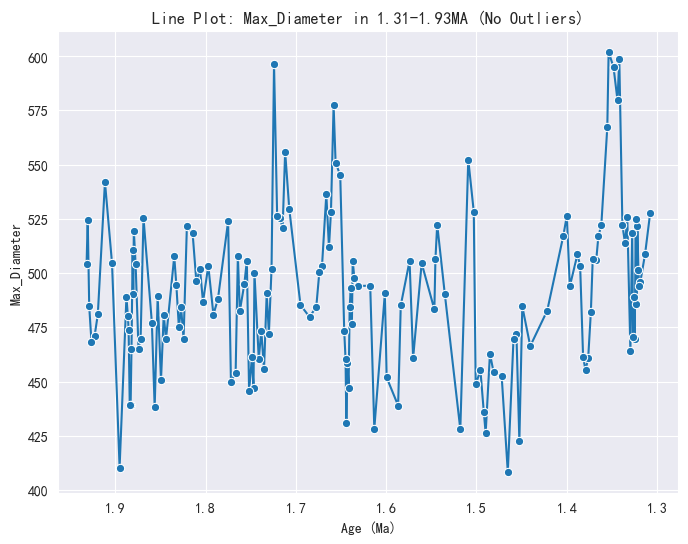

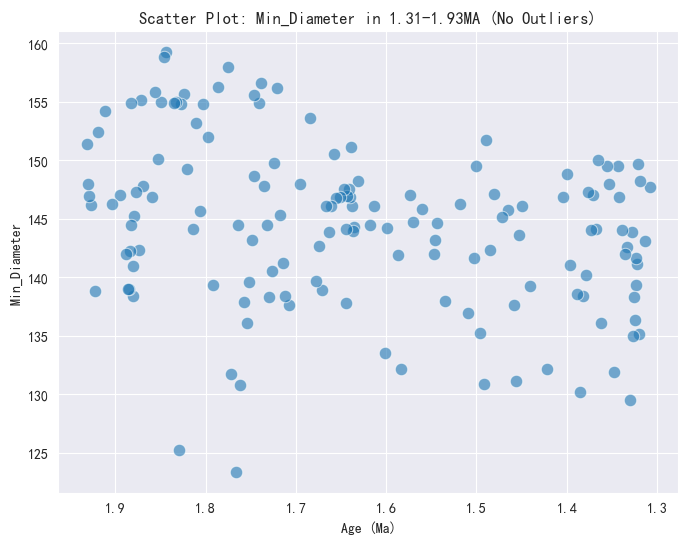

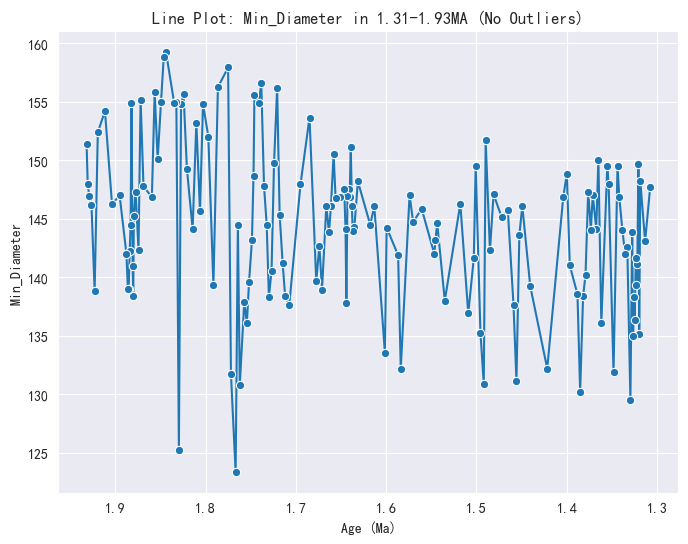

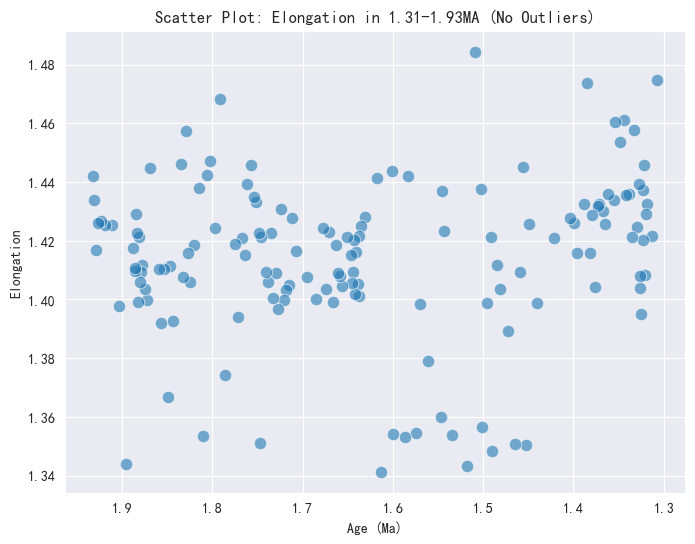

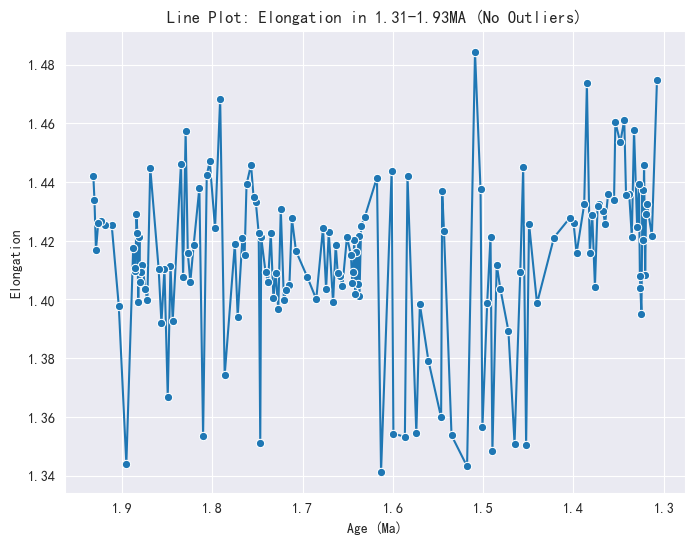

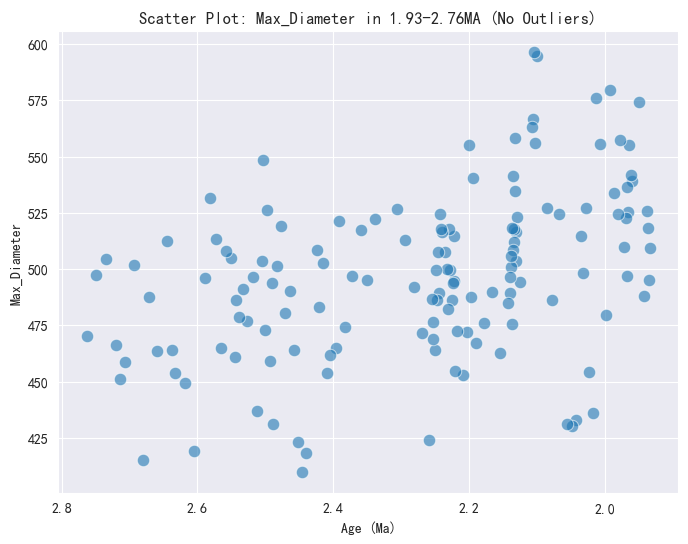

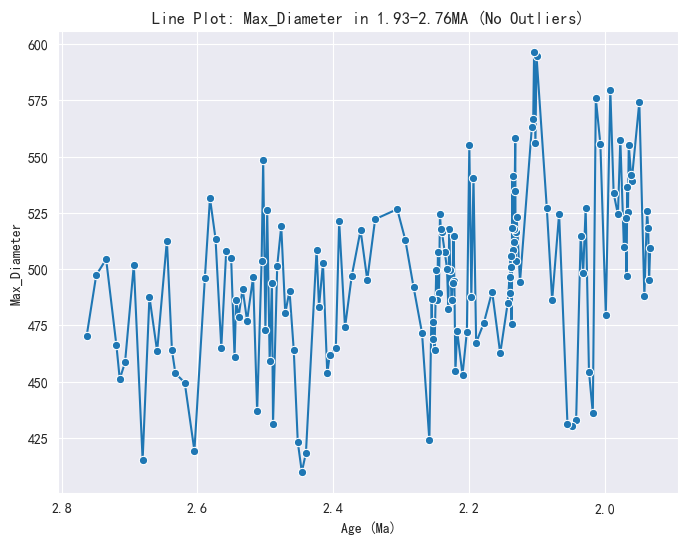

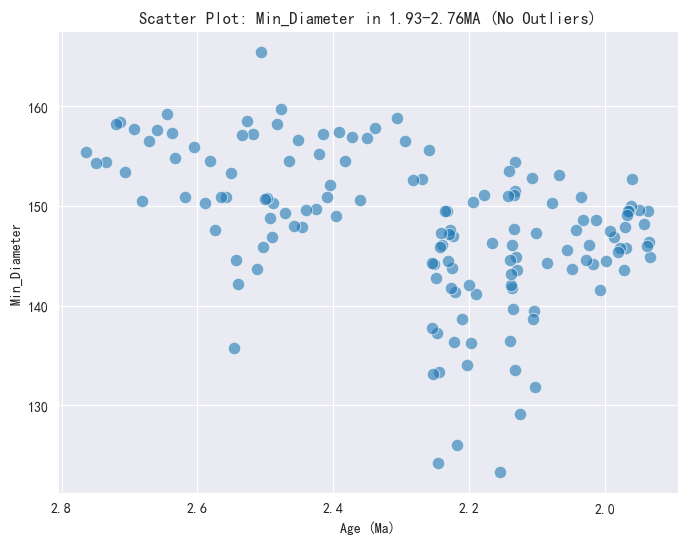

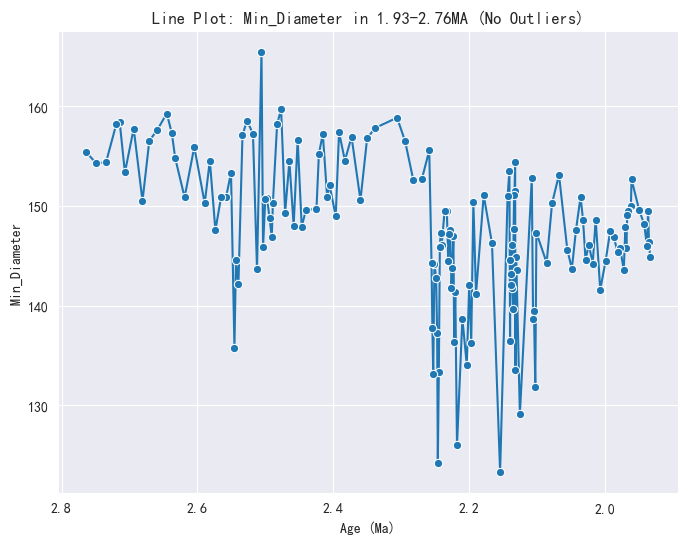

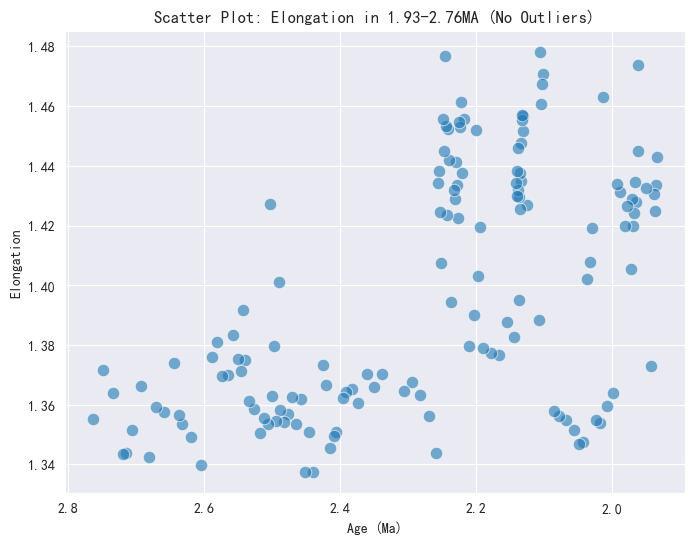

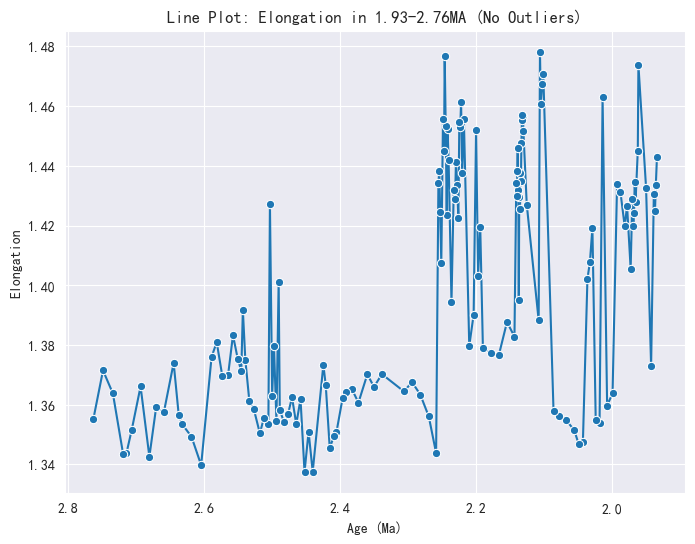

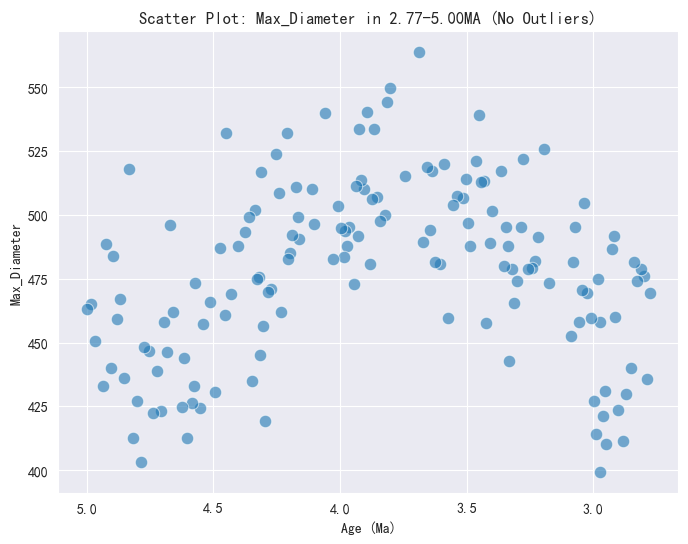

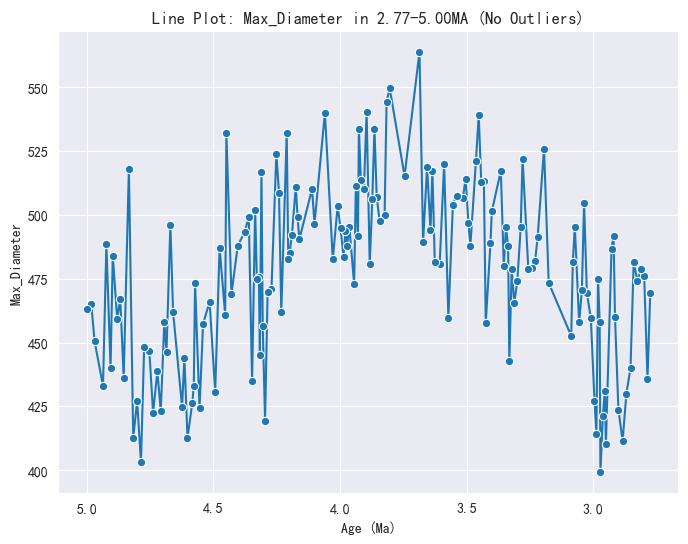

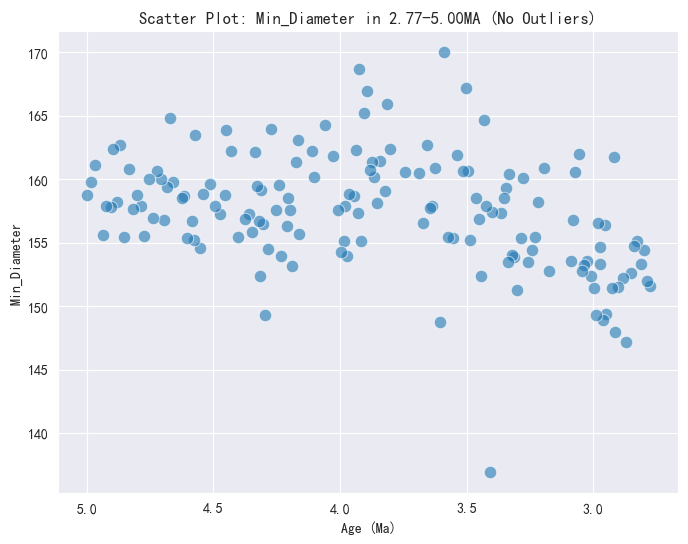

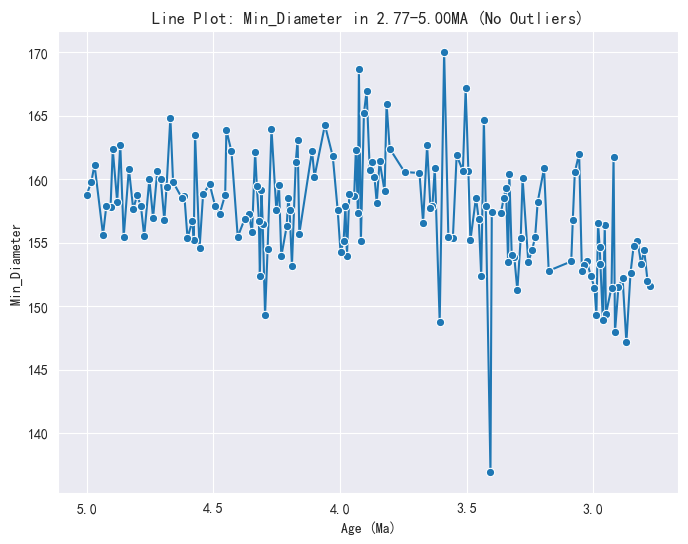

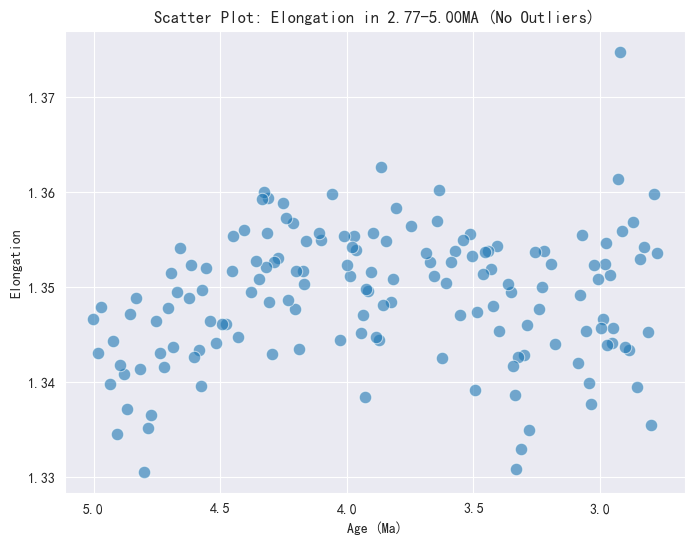

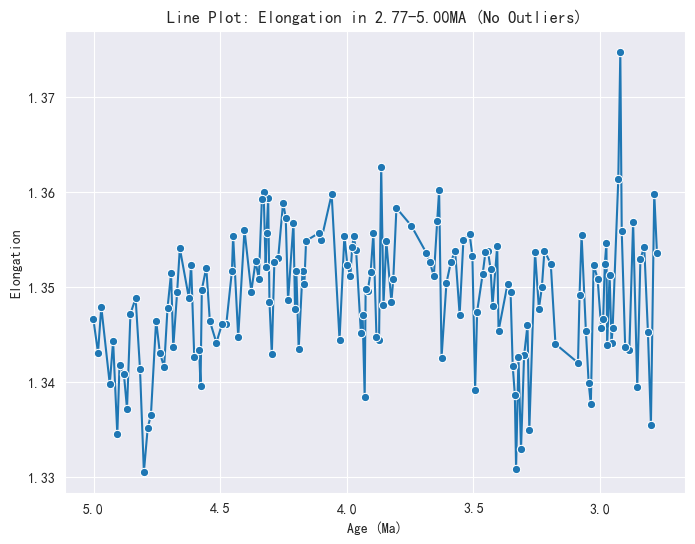

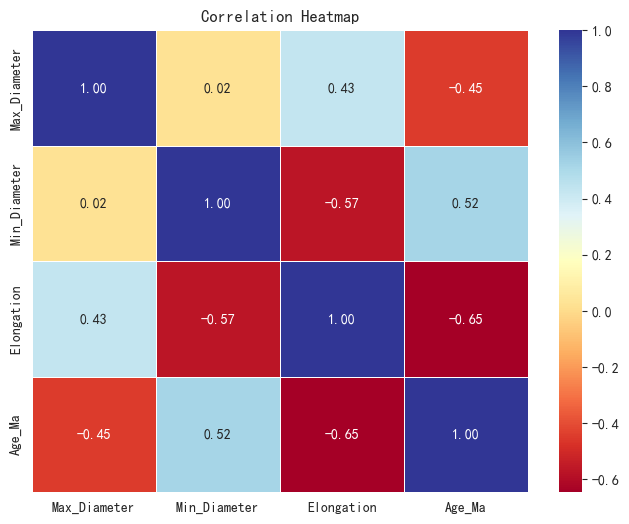

In [4]:

for feature in selected_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=cleaned_data , x="Age_Group", y=feature, 
                order=["0.01-0.62MA", "0.63-1.31MA", "1.31-1.93MA", "1.93-2.76MA", "2.77-5.00MA"])
    plt.title(f"Box Plot: {feature} Across Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel(feature)
    plt.savefig(f"{save_path}BoxPlot_{feature}.png", dpi=300)
    plt.show()

for age_group in cleaned_data["Age_Group"].unique():
    df_group = cleaned_data[cleaned_data["Age_Group"] == age_group]

    for feature in selected_cols:
        # 🔹 散点图
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_group, x="Age_Ma", y=feature, alpha=0.6, s=80)
        plt.title(f"Scatter Plot: {feature} in {age_group} (No Outliers)")
        plt.xlabel("Age (Ma)")
        plt.ylabel(feature)
        plt.gca().invert_xaxis()  
        plt.savefig(f"{save_path}Scatter_{age_group}_{feature}_NoOutliers.png", dpi=300)
        plt.show()

        # 🔹 折线图
        plt.figure(figsize=(8, 6))
        sns.lineplot(data=df_group, x="Age_Ma", y=feature, marker="o")
        plt.title(f"Line Plot: {feature} in {age_group} (No Outliers)")
        plt.xlabel("Age (Ma)")
        plt.ylabel(feature)
        plt.gca().invert_xaxis()  
        plt.savefig(f"{save_path}Line_{age_group}_{feature}_NoOutliers.png", dpi=300)
        plt.show()


df_sorted[selected_cols + ["Age_Ma"]] = df_sorted[selected_cols + ["Age_Ma"]].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_sorted[selected_cols + ["Age_Ma"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig(f"{save_path}Correlation_Heatmap.png", dpi=300)
plt.show()
